# K-nearest neighbors

Simple k-nn model for classification.

## 1. Data preprocessing

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [24]:
size = (1000,2)

In [25]:
data1 = np.random.normal((2,2), (1,2), size=size)
data2 = np.random.normal((-2,-2), (1,2), size=size)

label1 = np.zeros(size[0])
label2 = np.ones(size[0])

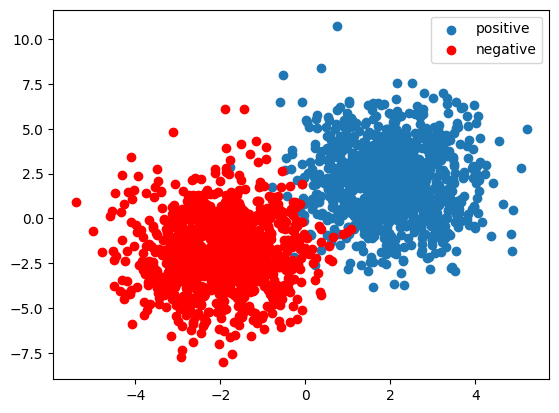

In [26]:
plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data2[:,0],data2[:,1], c='red')
plt.legend(['positive', 'negative'])

In [27]:
X = np.concatenate([data1, data2])
y = np.concatenate([label1, label2])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Training functions

In [29]:
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [30]:
def calculate_distances(x, X_train):
    distances = np.zeros(len(X_train))
    for i in range(len(X_train)):
        distances[i] = distance(X_train[i], x)
    return distances

In [31]:
def get_k_closest_index(distances, k):
    sorted_indices = np.argsort(distances)
    return sorted_indices[:k]

In [32]:
def predict(y_train, sorted_indices):
    return round(np.mean(y_train[sorted_indices]))

In [33]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

## Training

In [55]:
k = 5

In [56]:
y_pred = np.zeros(y_test.shape)
for i in range(len(X_test)):
    distances = calculate_distances(X_test[i], X_train)
    knn_indices = get_k_closest_index(distances, k)
    y_pred[i] = predict(y_train, knn_indices)

In [57]:
acc_test = accuracy(y_test, y_pred)

In [58]:
print(f"Accuracy: {acc_test}")

Accuracy: 0.9825


In [59]:
wrong_positive_indices = []
wrong_negative_indices = []
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        if y_pred[i] == 1:
            wrong_positive_indices.append(i)
        else:
            wrong_negative_indices.append(i)

In [60]:
wrong_positive_X = X_test[wrong_positive_indices]
wrong_negative_X = X_test[wrong_negative_indices]

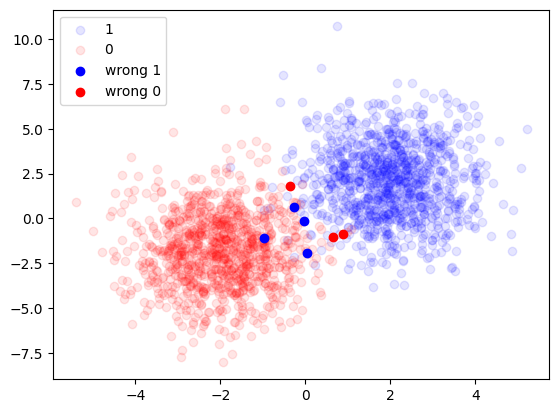

In [62]:
plt.scatter(data1[:,0],data1[:,1], alpha=0.1, c='blue')
plt.scatter(data2[:,0],data2[:,1], alpha=0.1, c='red')
plt.scatter(wrong_positive_X[:,0], wrong_positive_X[:,1], c='blue')
plt.scatter(wrong_negative_X[:,0], wrong_negative_X[:,1], c='red')
plt.legend(['1','0','wrong 1','wrong 0'])

## 4. Comparison with scikit-learn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred_sk = knn.predict(X_test)

In [51]:
acc_test_sk = accuracy(y_test, y_pred_sk)

In [52]:
print(f"Accuracy: {acc_test_sk}")

Accuracy: 0.9825


In [54]:
print(f'Accuracy difference between our model and scikit-learn model: {acc_test - acc_test_sk}')

Accuracy difference between our model and scikit-learn model: 0.0
